# Question 1 (Part 1)

In [ ]:
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Importing IRIS Dataset

In [ ]:
iris = datasets.load_iris()
# Column Values: Sepal Length, Sepal Width, Petal Length, Petal Width.(
iris

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [ ]:
X = iris.data[:, 1:3]  
y = iris.target

In [ ]:
X.shape

(150, 2)

## Plotting IRIS 'sepal width' vs 'Petal length'

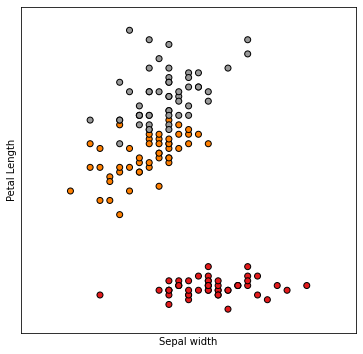

In [ ]:
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(1, figsize=(6, 6))
# plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('Sepal width')
plt.ylabel('Petal Length')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

fig = plt.figure(1, figsize=(8, 6))

plt.show()

## Using Logisting Regression to plot linear boundry

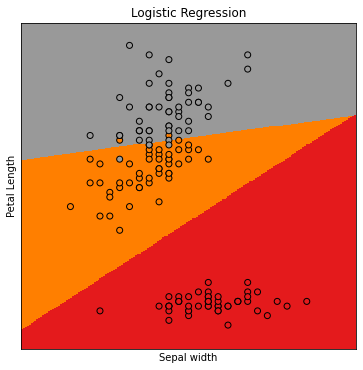

In [ ]:
from sklearn.linear_model import LogisticRegression

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, y)

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Set1)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Set1)
plt.xlabel('Sepal width')
plt.ylabel('Petal Length')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.title("Logistic Regression")

plt.show()

### Accuracy using Logistic Regression

In [ ]:
y_pred = logreg.predict(X)
cm = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
print("Logistic Regression :")
print("Accuracy = ", accuracy)
print(cm)

Logistic Regression :
Accuracy =  0.9533333333333334
[[50  0  0]
 [ 0 47  3]
 [ 0  4 46]]


# Part 2

## Using Linear Discriminant Analysis on IRIS Dataset


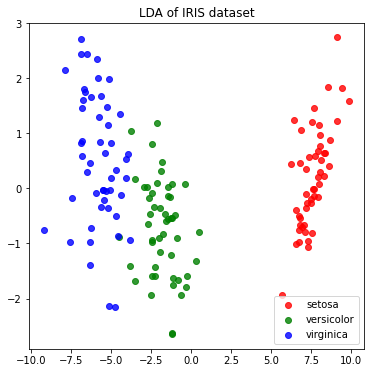

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit(X, y).transform(X)

plt.figure(1, figsize=(6,6))
colors = ['red', 'green', 'blue']
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_lda[y == i, 0], X_lda[y == i, 1], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of IRIS dataset')

plt.show()

### Accuracy using LDA

In [ ]:
y_pred = lda.predict(X)
cm = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
print("LDA :")
print("Accuracy = ", accuracy)
print(cm)

LDA :
Accuracy =  0.98
[[50  0  0]
 [ 0 48  2]
 [ 0  1 49]]


# Part 3

We can see that the accuracy using dimentionality redduction technique of LDA (Linear Discriminant Analysis)is much better than using Logistic Regression for 3 classes.